# One Sided Selection

First finds the hardest instances to classify correctly from the majority class. Then removes noisy observations with Tomek Links.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import OneSidedSelection

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with One Side Selection

[OneSidedSelection](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html)

### Well separated classes

In [3]:
# create data

X, y = make_data(sep=2)

# set up OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default, algo to find the hardest instances.
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X, y)

In [4]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((730, 2), (730,))

Note that more observations have been removed compared to Tomek Links alone (tip, check previous notebook).

In [6]:
# number of minority class observations

y.value_counts()

0    983
1     17
dtype: int64

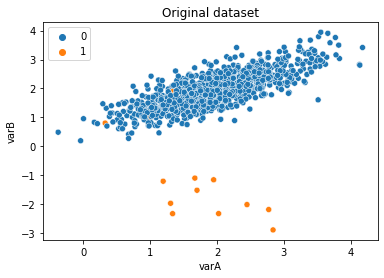

In [7]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

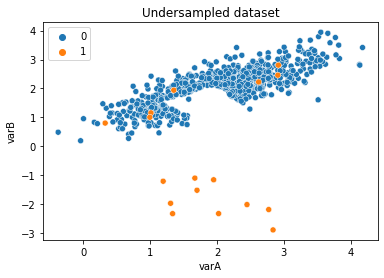

In [8]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

In [9]:
# create data
X, y = make_data(sep=0.5)

# set up OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X, y)

In [10]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# undersampled data

X_resampled.shape, y_resampled.shape

((939, 2), (939,))

Note that more samples were excluded in the final training set, compared to the previous case where classes were more separated.

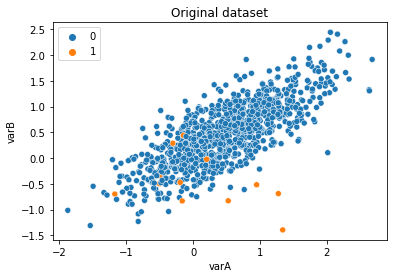

In [12]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

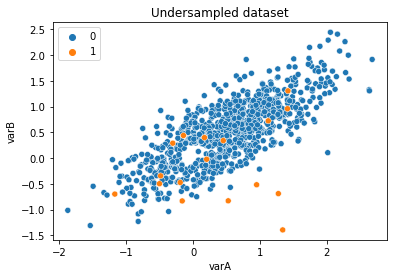

In [13]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

**HOMEWORK**

- Remove both observations from the Tomek Link and compare the sizes of the undersampled datasets and the distribution of the observations in the plots.
- Change the number of neighbours as well and compare the results.

===


## One Sided Selection

### Real data - Performance comparison

Does it work well with real datasets? 

Well, it will depend on the dataset, so we need to try and compare the models built on the whole dataset, and that built on the undersampled dataset.

In [14]:
# load data
# only a few observations to speed the computaton

data = pd.read_csv('../kdd2004.csv').sample(10000, random_state=1)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
88984,71.15,32.43,1.29,28.0,-39.0,1639.2,-1.33,1.03,9.5,-82.5,...,1054.2,0.80,3.28,0.0,-60.0,623.1,0.11,0.25,0.31,-1
140218,30.72,36.17,-0.24,-6.5,3.5,1249.7,0.45,0.32,8.0,-75.0,...,1524.8,-2.70,0.75,-3.0,-20.0,1.2,0.74,0.56,0.29,-1
91280,11.84,42.86,0.21,-25.0,26.5,2346.3,0.10,-0.77,-38.0,-62.0,...,3392.7,-2.76,1.02,21.0,-106.0,1236.6,0.01,0.56,0.27,-1
22351,26.67,28.57,-0.57,0.5,50.5,1195.0,0.69,0.16,-3.5,-43.0,...,1301.9,1.10,0.09,7.0,-29.0,263.0,0.51,0.58,0.61,-1
27966,40.32,26.34,-0.97,-57.5,79.5,4939.5,-0.80,0.56,7.5,-117.5,...,3544.6,0.84,0.02,15.0,-196.0,1667.2,0.16,0.14,0.28,-1


In [15]:
# imbalanced target
data.target.value_counts() / len(data)

-1    0.99
 1    0.01
Name: target, dtype: float64

In [16]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [17]:
# this is going to take a while

# set up OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # undersamples only the majority class
    random_state=0,  # for reproducibility
    n_neighbors=1,# default
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = oss.fit_resample(X_train, y_train)

In [18]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((6827, 74), (6827,))

In [19]:
# number of positive class in original dataset
y_train.value_counts()

-1    6931
 1      69
Name: target, dtype: int64

## Plot data

Let's compare how the data looks before and after the undersampling.

Text(0.5, 1.0, 'Original data')

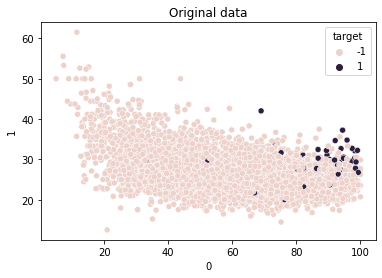

In [20]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

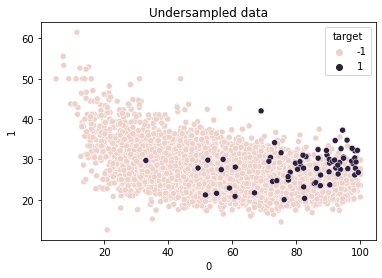

In [21]:
# undersampled data

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

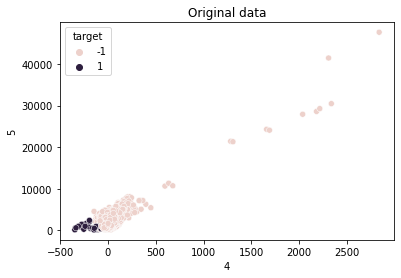

In [22]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

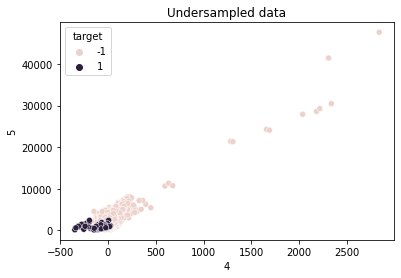

In [23]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [24]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [25]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9882799186180969
Test set
Random Forests roc-auc: 0.9809319962189941


In [26]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9925284472294779
Test set
Random Forests roc-auc: 0.9706537446082639


One Sided Selection did not seem to improve performance.

**HOMEWORK**

- Try removing both members of the Tomek Link and changing the number of neighbours. Compare final dataset size, model performance and the distributions of the observations before and after the undersampling.